#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A">Practica 3: Aplicacion de modelos KNN  Ibarra Ramírez Sergio </font>

Vamos a importar los datos

In [3]:
import pandas as pd 
tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/Alumni_Giving_Regression.csv")

tabla

,A,B,C,D,E,F
0,24,0.42,0.16,0.59,0.81,0.08
1,19,0.49,0.04,0.37,0.69,0.11
2,18,0.24,0.17,0.66,0.87,0.31
3,8,0.74,0.00,0.81,0.88,0.11
4,8,0.95,0.00,0.86,0.92,0.28
...,...,...,...,...,...,...
118,11,0.54,0.03,0.89,0.94,0.29
119,15,0.37,0.22,0.69,0.83,0.13
120,23,0.32,0.19,0.59,0.80,0.12
121,19,0.43,0.06,0.49,0.73,0.13


De nuevo dividimos nuestra data en train y test

In [4]:
from sklearn.model_selection import train_test_split

# AQUI SEPARO DEPENDIENTE DE INDEPENDIENTES
y = tabla["E"] 
X = tabla.drop(["E"],axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2,random_state=2023)

Solo vamos a normalizar los datos de las variables indpendientes con base en el MAXIMO de los datos de entrnamiento  

In [5]:
Tabla_X_train_Normalizada = X_train1.div(X_train1.max())
Tabla_X_train_Normalizada

,A,B,C,D,F
100,0.354839,0.705263,0.193548,0.770833,0.463415
115,0.451613,0.442105,0.322581,0.552083,0.243902
50,0.645161,0.400000,0.129032,0.458333,0.243902
60,0.677419,0.400000,0.612903,0.729167,0.317073
4,0.258065,1.000000,0.000000,0.895833,0.682927
...,...,...,...,...,...
33,0.612903,0.368421,0.387097,0.854167,0.341463
55,0.580645,0.368421,0.516129,0.843750,0.243902
70,0.451613,0.389474,0.419355,0.937500,0.536585
25,0.580645,0.410526,0.161290,0.395833,0.073171


In [6]:
Tabla_X_test_Normalizada = X_test1.div(X_train1.max())
Tabla_X_test_Normalizada


,A,B,C,D,F
89,0.709677,0.442105,0.258065,0.385417,0.048780
114,0.387097,0.347368,0.677419,0.833333,0.365854
9,0.451613,0.515789,0.290323,0.739583,0.341463
97,0.612903,0.200000,0.612903,0.572917,0.121951
30,0.677419,0.431579,0.516129,0.875000,0.365854
42,0.516129,0.515789,0.387097,0.729167,0.292683
27,0.903226,0.242105,0.709677,0.479167,0.146341
76,0.806452,0.378947,0.645161,0.625000,0.292683
64,0.548387,0.463158,0.387097,0.583333,0.146341
12,0.612903,0.347368,0.225806,0.635417,0.195122


In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

Vamos a definir y entrenar el modelo RadiusNeighborsRegressor para diferentes valores de r

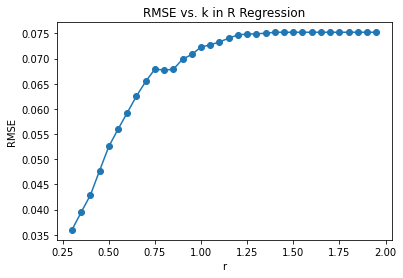

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

R_values = np.arange(0.3, 2, 0.05)

# Initialize an empty list to store the RMSE values
rmse_R_values = []

# Loop through each k value
for r in R_values:
    # Define the KNN regression model
    modeloR = RadiusNeighborsRegressor(radius=r)
    
    # Fit the model to the training data
    modeloR.fit(Tabla_X_train_Normalizada, y_train1)
    
    # Make predictions on the test data
    y_predR = modeloR.predict(Tabla_X_test_Normalizada)
    
    # Calculate the RMSE
    rmse_R = mean_squared_error(y_test1, y_predR, squared=False)
    
    # Append the RMSE value to the list
    rmse_R_values.append(rmse_R)

# Plot the RMSE values against the k values
plt.plot(R_values, rmse_R_values, marker='o')
plt.xlabel('r')
plt.ylabel('RMSE')
plt.title('RMSE vs. k in R Regression')
plt.show()

Ahora vamos aintentar con el modelo de KNN

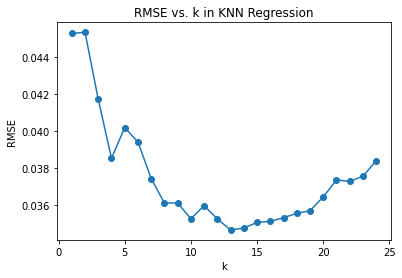

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values
k_values = np.arange(1, 25)

# Initialize an empty list to store the RMSE values
rmse_values = []

# Loop through each k value
for k in k_values:
    # Define the KNN regression model
    modeloK = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model to the training data
    modeloK.fit(Tabla_X_train_Normalizada, y_train1)
    
    # Make predictions on the test data
    y_predK = modeloK.predict(Tabla_X_test_Normalizada)
    
    # Calculate the RMSE
    rmse = mean_squared_error(y_test1, y_predK, squared=False)
    
    # Append the RMSE value to the list
    rmse_values.append(rmse)

# Plot the RMSE values against the k values
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs. k in KNN Regression')
plt.show()

#### Otro intento de normalización  (que resultó no ser muy adecuado)

Para aplicar el modelo de KNN Regresission es muy recomendable que los datos estén estandarizados 

In [6]:
Tabla_Normalizada_2 = tabla.div(tabla.max())
Tabla_Normalizada_2

,A,B,C,D,E,F
0,0.774194,0.442105,0.516129,0.614583,0.826531,0.195122
1,0.612903,0.515789,0.129032,0.385417,0.704082,0.268293
2,0.580645,0.252632,0.548387,0.687500,0.887755,0.756098
3,0.258065,0.778947,0.000000,0.843750,0.897959,0.268293
4,0.258065,1.000000,0.000000,0.895833,0.938776,0.682927
...,...,...,...,...,...,...
118,0.354839,0.568421,0.096774,0.927083,0.959184,0.707317
119,0.483871,0.389474,0.709677,0.718750,0.846939,0.317073
120,0.741935,0.336842,0.612903,0.614583,0.816327,0.292683
121,0.612903,0.452632,0.193548,0.510417,0.744898,0.317073


Vamos a separar la data de train y de test 

In [13]:
from sklearn.model_selection import train_test_split

y = Tabla_Normalizada_2["E"]
X = Tabla_Normalizada_2.drop(["E"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

Vamos a definir y entrenar el modelo RadiusNeighborsRegressor para diferentes valores de r

In [8]:
from sklearn.neighbors import RadiusNeighborsRegressor

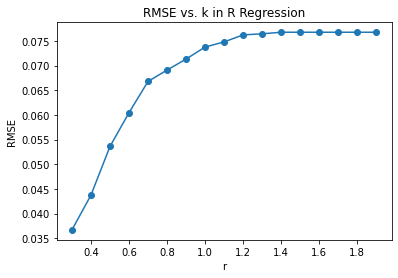

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

R_values = np.arange(0.3, 2, 0.1)

# Initialize an empty list to store the RMSE values
rmse_R_values = []

# Loop through each k value
for r in R_values:
    # Define the KNN regression model
    modeloR = RadiusNeighborsRegressor(radius=r)
    
    # Fit the model to the training data
    modeloR.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_predR = modeloR.predict(X_test)
    
    # Calculate the RMSE
    rmse_R = mean_squared_error(y_test, y_predR, squared=False)
    
    # Append the RMSE value to the list
    rmse_R_values.append(rmse_R)

# Plot the RMSE values against the k values
plt.plot(R_values, rmse_R_values, marker='o')
plt.xlabel('r')
plt.ylabel('RMSE')
plt.title('RMSE vs. k in R Regression')
plt.show()

Vamos a definir y entrenar el modelo RadiusNeighborsRegressor para diferentes valores de r

In [19]:
from sklearn.neighbors import KNeighborsRegressor

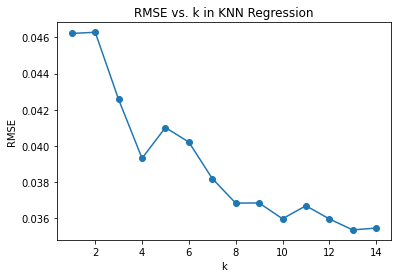

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values
k_values = np.arange(1, 15)

# Initialize an empty list to store the RMSE values
rmse_values = []

# Loop through each k value
for k in k_values:
    # Define the KNN regression model
    modeloK = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model to the training data
    modeloK.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_predK = modeloK.predict(X_test)
    
    # Calculate the RMSE
    rmse = mean_squared_error(y_test, y_predK, squared=False)
    
    # Append the RMSE value to the list
    rmse_values.append(rmse)

# Plot the RMSE values against the k values
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE vs. k in KNN Regression')
plt.show()
